# 2. szorgalmi házi feladat

A 2. szorgalmi házi feladatban a 2. kötelező házi feladat megoldását kell kiterjeszteni. Vizualizálandó a regressziós neuronháló által tanult hipotézisfüggvény, illetva a klasszifikációs háló által tanult kategorizációs döntés. A részleteket lásd lentebb.

**(Végső) határidő:**  2021. május 3., hétfő, 23:59.

**Pontozás:** A szorgalmi házi feladat helyes megoldása esetén 5 pontot szerezhető.

**!!! A feladatok megoldását, illetve a megoldások jelentős részét tartalmazó kódrészletet bárhol közzétenni tilos !!!**

**Megoldás és beküldés menete:**

A közzétett, feladatokat tartalmazó Google Colab notebook csak "view" jogosultságokkal van megosztva, így, bár a notebook szerkeszthetőnek látszik, az úgynevezett "Playground" módban nyílik meg, ahol a változtatások nem lesznek mentve. Mindenkinek le kell másolnia a saját Drive-jára a notebook-ot (Google Colab file menü -> Save a copy to Drive): a másolat már maradandóan szerkeszthető és futtatható lesz. **A kész megoldást tartalmazó notebook-ot le kell tölteni**  (Google Colab file menü -> Download .ipynb), **majd a Canvas-ban, a kiírt feladatnál feltölteni.** Link nem adható be, csak az .ipynb fájl. Alternatívaként, Google Colab helyett saját gépen futó Python-nal és Jupyter-rel is szerkeszthetők és futtathatók .ipynb notebookok. 

###**J**: A regressziós modell által tanult hipotézisfüggvény vizualizációja.

A 2. kötelező házi feladat A-E feladatainak megoldása szükséges ehhez a feladathoz. Az említett feladatok megoldása átmásolható ebbe a notebookba.

- Válassz ki két input változót a használt adatbázisból. Az ehhez a feladathoz felhasznált adatbázis szabadon választható a 6 lehetőség közül, nem szükséges feltétlenül a kötelező házi feladatban kijelölt adatbázissal dolgozni.
- Futtasd le és tanítsd be az A-E részfeladatokat csak a kiválasztott két input változót használva.
- Vizualizáld a regressziós modell által tanult hipotézisfüggvényt egy matplotlib pcolor (pcolormesh) ploton!
- Rajzold ki ugyanarra a grafikonra a teszthalmaz adatpontjait! A grafikon úgy legyen méretezve, hogy a teszthalmaz összes adatpontja ráférjen a grafikonra és nagyjából kitöltsék azt!
- A grafikon rendelkezzen szín-érték skálával (colorbar).
- A betanításhoz a kötelező házi feladatot követve skálázd a két input változót azonos nagyságrendre, de a grafikonon a tengelyek az eredeti értékeket mutassák, ne a normalizáltakat.
- A grafikon két tengelye mellett szerepeljen a két input változó neve. Az input változók nevei megtalálhatók az adatbázis első sorában.

Egy példa az előállított grafikonra. Ehhez a grafikonhoz a beton-szilárdság (6.) adatbázis "cement mennyisége" és "beton életkora" változókat használtuk fel.

<img src="https://docs.google.com/uc?export=download&id=1Yax_glMlruUCASuyjZhmbrKEvA5b9FG5" style="display:inline-block">
<hr>

###**K**: A klasszifikációs modell által tanult kategorizációs döntés vizualizációja.

A 2. kötelező házi feladat A-C és F-I feladatainak megoldása szükséges ehhez a feladathoz. Az említett feladatok megoldása átmásolható ebbe a notebookba.

- Válassz ki két input változót a használt adatbázisból. Az ehhez a feladathoz felhasznált adatbázis szabadon választható a 6 lehetőség közül, nem szükséges feltétlenül a kötelező házi feladatban kijelölt adatbázissal dolgozni.
- Futtasd le és tanítsd be az A-C és F-I részfeladatokat csak a kiválasztott két input változót használva.
- Vizualizáld a klasszifikációs modell által tanult döntést egy matplotlib pcolor (pcolormesh) ploton! Azaz, minden pixelre a legvalószínűbbnek becsült kategória színét rajzold ki!
- Rajzold ki ugyanarra a grafikonra a teszthalmaz adatpontjait! A grafikon úgy legyen méretezve, hogy a teszthalmaz összes adatpontja ráférjen a grafikonra és nagyjából kitöltsék azt! Az adatpontokat színezd három színnel aszerint, hogy valójában melyik kategóriába tartoznak. (Az azonos kategóriájú pixelek és adatpontok színe ne legyen ugyanaz, hogy látszódjanak a pontok a háttéren...)
- A grafikon rendelkezzen szín-érték skálával (colorbar).
- A betanításhoz a kötelező házi feladatot követve skálázd a két input változót azonos nagyságrendre, de a grafikonon a tengelyek az eredeti értékeket mutassák, ne a normalizáltakat.
- A grafikon két tengelye mellett szerepeljen a két input változó neve. Az input változók nevei megtalálhatók az adatbázis első sorában.

Egy példa az előállított grafikonra. Ehhez a grafikonhoz a beton-szilárdság (6.) adatbázis "cement mennyisége" és "beton életkora" változókat használtuk fel. (A 0-s, 1-es, 2-es igazi kategóriájú adatpontok színe rendre cián, lime-zöld, narancssárga ezen az ábrán.)

<img src="https://docs.google.com/uc?export=download&id=113huT3ySbjV-uinP9NXOJ_B_o2zrJBcE" style="display:inline-block">
<hr>

Az adatbázis letöltése.

In [10]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

%tensorflow_version 2.x
import tensorflow as tf
import tensorflow.keras.models
import tensorflow.keras.optimizers
import tensorflow.keras.layers
import tensorflow.keras.activations
import tensorflow.keras.callbacks

import matplotlib.pyplot as plt
from matplotlib import lines
from matplotlib import colors as c
import urllib.request

dataset1_url = 'https://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw2/qsar_fish_toxicity.csv'
dataset2_url = 'https://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw2/student-mat_prep.csv'
dataset3_url = 'https://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw2/student-por_prep.csv'
dataset4_url = 'https://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw2/student-mat_nograde_prep.csv'
dataset5_url = 'https://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw2/student-por_nograde_prep.csv' 
dataset6_url = 'https://nipg12.inf.elte.hu/~vavsaai@nipg.lab/annbsc21_p1_hw2/Concrete_Data.csv'

#

url = dataset6_url

ftpstream = urllib.request.urlopen(url)
content = ftpstream.read().decode('utf-8')
print(len(content.split('\n')))
print(content[:1500])


1032
Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water  (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate  (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals) "
540.0 ,0.0 ,0.0 ,162.0 ,2.5 ,1040.0 ,676.0 ,28 ,79.99 
540.0 ,0.0 ,0.0 ,162.0 ,2.5 ,1055.0 ,676.0 ,28 ,61.89 
332.5 ,142.5 ,0.0 ,228.0 ,0.0 ,932.0 ,594.0 ,270 ,40.27 
332.5 ,142.5 ,0.0 ,228.0 ,0.0 ,932.0 ,594.0 ,365 ,41.05 
198.6 ,132.4 ,0.0 ,192.0 ,0.0 ,978.4 ,825.5 ,360 ,44.30 
266.0 ,114.0 ,0.0 ,228.0 ,0.0 ,932.0 ,670.0 ,90 ,47.03 
380.0 ,95.0 ,0.0 ,228.0 ,0.0 ,932.0 ,594.0 ,365 ,43.70 
380.0 ,95.0 ,0.0 ,228.0 ,0.0 ,932.0 ,594.0 ,28 ,36.45 
266.0 ,114.0 ,0.0 ,228.0 ,0.0 ,932.0 ,670.0 ,28 ,45.85 
475.0 ,0.0 ,0.0 ,228.0 ,0.0 ,932.0 ,594.0 ,28 ,39.29 
198.6 ,132.4 ,0.0 ,192.0 ,0.0 ,978.4 ,82

# Megoldásom

### Házi feladat metódusai

In [11]:
def preprocess_data(content): 
  lines = content.split('\n')
  print(len(lines))
  header = lines[0]
  header = [name for name in header.split(',') ]
  lines = lines[1:-1]
  lines = [line.split(',') for line in lines]
  data = [[ float(item) for item in line] for line in lines]
  data = np.array( data, dtype = np.float32 )
  # data.shape = (395, 31)
  features = data[:,0:-1]
  labels = data[:,-1]
  labels = labels.flatten()
  return (header, features, labels)

def separate_data(features, labels, train_part, val_part):
  p = np.random.permutation(features.shape[0])
  features = features[p]
  labels = labels[p]
  section_train = int(features.shape[0] * train_part)
  section_val = section_train + int(features.shape[0] * val_part)
  x_unnorm_train = features[:section_train]
  x_unnorm_val = features[section_train:section_val]
  x_unnorm_test = features[section_val:]
  y_train = labels[:section_train]
  y_val = labels[section_train:section_val]
  y_test = labels[section_val:]

  print("len of train | val | test: " + str(y_train.shape[0]) + " | " + str(y_val.shape[0]) + " | " + str(y_test.shape[0]))
  return x_unnorm_train, x_unnorm_val, x_unnorm_test, y_train, y_val, y_test

def normalize_input_features(x_unnorm_train, x_unnorm_val, x_unnorm_test):
  train_min = np.min(x_unnorm_train, 0)
  train_max = np.max(x_unnorm_train, 0)
  x_train = np.divide(np.subtract(x_unnorm_train,train_min),np.subtract(train_max,train_min))
  x_val = np.divide(np.subtract(x_unnorm_val,train_min),np.subtract(train_max,train_min))
  x_test = np.divide(np.subtract(x_unnorm_test,train_min),np.subtract(train_max,train_min))

  return x_train, x_val, x_test

def my_normalize_func(x_input):
  input_min = np.min(x_input, 0)
  input_max = np.max(x_input, 0)
  norm_array = np.divide(np.subtract(x_input,input_min),np.subtract(input_max,input_min))
  return norm_array

def create_three_classes_from_regression_labels(y_train, y_val, y_test, lim1, lim2 ):
  FIRST_LIM = lim1
  SECOND_LIM = lim2

  y_cat_train = np.zeros((y_train.shape))
  y_cat_val = np.zeros((y_val.shape))
  y_cat_test  = np.zeros((y_test .shape))

  y_cat_train = np.add(y_cat_train, np.logical_and((y_train >= FIRST_LIM),  (y_train <= SECOND_LIM)))
  y_cat_train = np.add(y_cat_train, (y_train > SECOND_LIM)*2)

  y_cat_val = np.add(y_cat_val, np.logical_and((y_val >= FIRST_LIM),  (y_val <= SECOND_LIM)))
  y_cat_val = np.add(y_cat_val, (y_val > SECOND_LIM)*2)

  y_cat_test = np.add(y_cat_test, np.logical_and((y_test >= FIRST_LIM),  (y_test <= SECOND_LIM)))
  y_cat_test = np.add(y_cat_test, (y_test > SECOND_LIM)*2)

  #plots
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
  ax1.hist(y_train)
  ax1.set_xlabel("y_train histogram")
  ax2.hist(y_cat_train)
  ax2.set_xlabel("y_cat_train histogram")
  ax3.hist(y_cat_val)
  ax3.set_xlabel("y_cat_val histogram")
  ax4.hist(y_cat_test)
  ax4.set_xlabel("y_cat_test histogram")
  fig.show()
  return y_cat_train, y_cat_val, y_cat_test

def make_on_hot_from_labels(y_cat_train, y_cat_val, y_cat_test, depth_of_labels ):
  DEPTH = depth_of_labels

  y_onehot_train = tf.one_hot(y_cat_train, depth = DEPTH)
  y_onehot_train = np.array(y_onehot_train, dtype=np.float32)

  y_onehot_val = tf.one_hot(y_cat_val, depth = DEPTH)
  y_onehot_val = np.array(y_onehot_val, dtype=np.float32)

  y_onehot_test  = tf.one_hot(y_cat_test , depth = DEPTH)
  y_onehot_test  = np.array(y_onehot_test , dtype=np.float32)

  return y_onehot_train, y_onehot_val, y_onehot_test





### I. feladat. Modell betanítása

In [12]:
#Adatok feldolgozása
header, features, labels = preprocess_data(content)
features = features[:, [0,-1]] # Cement (component 1)(kg in a m^3 mixture) and AGE
x_unnorm_train, x_unnorm_val, x_unnorm_test, y_train, y_val, y_test = separate_data(features, labels, 0.75, 0.125)
x_train, x_val, x_test = normalize_input_features(x_unnorm_train, x_unnorm_val, x_unnorm_test)

1032
len of train | val | test: 772 | 128 | 130


In [13]:

def make_reg_model(first_dense, first_activation, input_dim, first_layer_dropout, learning_rate):
  reg_model = tf.keras.models.Sequential()
  reg_model.add(tf.keras.layers.Dense(first_dense, activation=first_activation, input_dim = input_dim))
  reg_model.add(tf.keras.layers.Dropout(first_layer_dropout))
  reg_model.add(tf.keras.layers.Dense(1))

  reg_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate), loss=tf.keras.losses.MSE, metrics=['mae'])
  return reg_model

In [14]:
#Keras regression model
reg_model = make_reg_model(input_dim=x_train.shape[1], first_dense=10, first_activation='relu', first_layer_dropout=0.3, \
                           learning_rate=0.001 )

Epoch 1/3000
7/7 - 0s - loss: 1566.5099 - mae: 35.7651 - val_loss: 1378.2296 - val_mae: 33.2917
Epoch 2/3000
7/7 - 0s - loss: 1460.5117 - mae: 34.2972 - val_loss: 1232.9868 - val_mae: 31.1072
Epoch 3/3000
7/7 - 0s - loss: 1258.6165 - mae: 31.2497 - val_loss: 969.9144 - val_mae: 26.7454
Epoch 4/3000
7/7 - 0s - loss: 951.3975 - mae: 26.0854 - val_loss: 621.4274 - val_mae: 20.3595
Epoch 5/3000
7/7 - 0s - loss: 637.7552 - mae: 20.2088 - val_loss: 353.3647 - val_mae: 15.0694
Epoch 6/3000
7/7 - 0s - loss: 437.4218 - mae: 16.3587 - val_loss: 253.0993 - val_mae: 12.6854
Epoch 7/3000
7/7 - 0s - loss: 409.0082 - mae: 15.7821 - val_loss: 219.2297 - val_mae: 12.0142
Epoch 8/3000
7/7 - 0s - loss: 369.1667 - mae: 15.3732 - val_loss: 213.3750 - val_mae: 11.9029
Epoch 9/3000
7/7 - 0s - loss: 383.7265 - mae: 15.3942 - val_loss: 217.0295 - val_mae: 11.9569
Epoch 10/3000
7/7 - 0s - loss: 362.0305 - mae: 15.3125 - val_loss: 210.5031 - val_mae: 11.8346
Epoch 11/3000
7/7 - 0s - loss: 368.2477 - mae: 14.9651

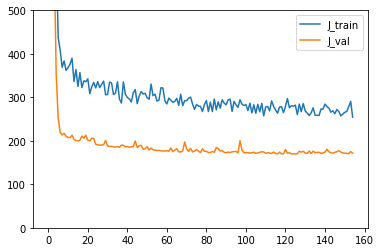

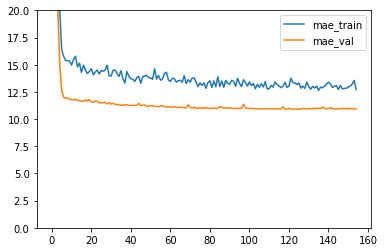

In [15]:

earlystopping_object = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 30)
history = reg_model.fit( x_train, y_train, validation_data=(x_val, y_val), epochs=3000, \
                           verbose=2, callbacks=[earlystopping_object], batch_size = 128)

fig, ax = plt.subplots()
ax.plot(history.history['loss'], label = "J_train")
ax.plot(history.history['val_loss'], label = "J_val")
ax.set_ybound(0,500)
ax.legend()
fig.show

fig, ax = plt.subplots()
ax.plot(history.history['mae'], label = "mae_train")
ax.plot(history.history['val_mae'], label = "mae_val")
ax.set_ybound(0,20)
ax.legend()
fig.show

test_loss, test_mae = reg_model.evaluate(x_test, y_test)
print("test loss: " + str(test_loss) + ", test_mae: " + str(test_mae))
y_pred_test = reg_model.predict(x_test)

### I. feladat. Regresszió vizualizációja

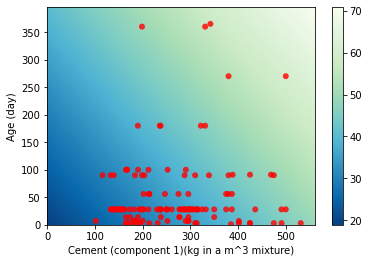

In [16]:

#Make a meshgrid and a test set
x_vector = np.linspace(0, x_unnorm_test[:,0].max()+30, len(x_unnorm_test[:,0])) # Cement
y_vector = np.linspace(0, x_unnorm_test[:,1].max()+30, len(x_unnorm_test[:,1])) # Age
X, Y = np.meshgrid(x_vector, y_vector)
x_test_plot = np.vstack( [X.ravel(), Y.ravel()] )
x_test_plot = x_test_plot.T   # shape = (16900, 2)
# Normalize
x_test_plot = my_normalize_func(x_test_plot)

y_test_pred_plot = reg_model.predict(x_test_plot)
#
Z = y_test_pred_plot.reshape(X.shape)


fig, ax = plt.subplots()
cmap = ax.pcolormesh(X,Y,Z, cmap='GnBu_r' , vmin=Z.min(), vmax=Z.max())
fig.colorbar(cmap)
ax.scatter(x=x_unnorm_test[:,0], y=x_unnorm_test[:,1], alpha=0.8, color = '#FF0000', edgecolors='none', linewidths=0 )

ax.set_ylabel(header[7])
ax.set_xlabel(header[0])


fig.show()


### II. feladat. Klasszifikációs modell betanítása

In [17]:
def create_classification_model(first_dense, first_activation, first_dropout, input_dim, second_dense, second_activation, second_dropout, learning_rate):
  my_model = tf.keras.models.Sequential()
  my_model.add(tf.keras.layers.Dense(first_dense, activation=first_activation, input_dim=input_dim ) )
  my_model.add(tf.keras.layers.Dropout(first_dropout))
  my_model.add(tf.keras.layers.Dense(second_dense, activation=second_activation))
  my_model.add(tf.keras.layers.Dropout(second_dropout))
  my_model.add(tf.keras.layers.Dense(3, activation='softmax'))

  my_model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate) , 
                  metrics=[] )
  return my_model

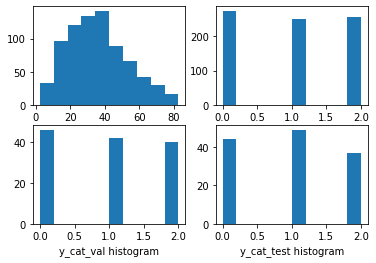

In [18]:
LIM_FIRST = 28
LIM_SECOND = 42
y_cat_train, y_cat_val, y_cat_test = create_three_classes_from_regression_labels(y_train, y_val, y_test, LIM_FIRST, LIM_SECOND )
y_onehot_train, y_onehot_val, y_onehot_test = make_on_hot_from_labels(y_cat_train, y_cat_val, y_cat_test, 3 )
cl_model = create_classification_model(first_dense = 10, first_activation = 'relu', \
                                       first_dropout = 0.3, input_dim = x_train.shape[1], \
                                       second_dense = 7, second_activation = 'sigmoid', \
                                       second_dropout = 0.3, learning_rate = 0.06)

Epoch 1/3500
7/7 - 1s - loss: 1.1502 - val_loss: 1.0975
Epoch 2/3500
7/7 - 0s - loss: 1.1418 - val_loss: 1.0936
Epoch 3/3500
7/7 - 0s - loss: 1.1354 - val_loss: 1.0930
Epoch 4/3500
7/7 - 0s - loss: 1.1487 - val_loss: 1.0944
Epoch 5/3500
7/7 - 0s - loss: 1.1476 - val_loss: 1.0927
Epoch 6/3500
7/7 - 0s - loss: 1.1414 - val_loss: 1.0925
Epoch 7/3500
7/7 - 0s - loss: 1.1289 - val_loss: 1.0926
Epoch 8/3500
7/7 - 0s - loss: 1.1269 - val_loss: 1.0924
Epoch 9/3500
7/7 - 0s - loss: 1.1331 - val_loss: 1.0918
Epoch 10/3500
7/7 - 0s - loss: 1.1442 - val_loss: 1.0921
Epoch 11/3500
7/7 - 0s - loss: 1.1298 - val_loss: 1.0917
Epoch 12/3500
7/7 - 0s - loss: 1.1365 - val_loss: 1.0946
Epoch 13/3500
7/7 - 0s - loss: 1.1208 - val_loss: 1.0936
Epoch 14/3500
7/7 - 0s - loss: 1.1302 - val_loss: 1.0918
Epoch 15/3500
7/7 - 0s - loss: 1.1451 - val_loss: 1.0929
Epoch 16/3500
7/7 - 0s - loss: 1.1442 - val_loss: 1.0963
Epoch 17/3500
7/7 - 0s - loss: 1.1282 - val_loss: 1.0994
Epoch 18/3500
7/7 - 0s - loss: 1.1239 - 

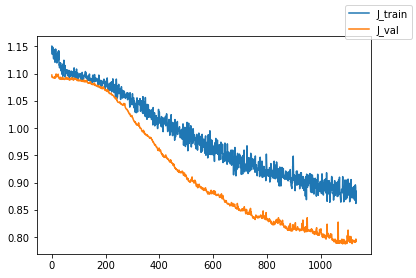

In [19]:
earlystop_o = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, mode="auto")
history = cl_model.fit(x=x_train, y=y_onehot_train, validation_data=(x_val, y_onehot_val), \
                       epochs=3500, verbose = 2, \
                       batch_size=128, callbacks=[earlystop_o])

y_pred_test = cl_model.predict(x_test)
test_loss = cl_model.evaluate(x_test, y_onehot_test)
f_one_score = f1_score(np.argmax(y_onehot_test, axis=1), np.argmax(y_pred_test, axis=1), average='macro')
print("test_loss: " + str(test_loss) + "  f_one_score: " + str(f_one_score))


fig, ax = plt.subplots()
ax.plot(history.history["loss"], label="J_train")
ax.plot(history.history["val_loss"], label="J_val")
fig.legend()
fig.show()





### II. feladat. Klasszifikáció vizualizációja

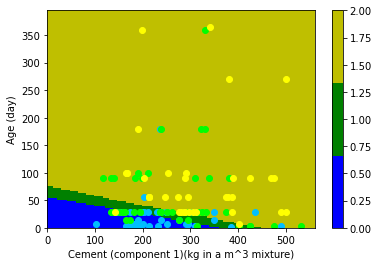

In [20]:
# make a meshgrid and a test set
x_vector = np.linspace(0, x_unnorm_test[:,0].max()+30, len(x_unnorm_test[:,0])) # Cement
y_vector = np.linspace(0, x_unnorm_test[:,1].max()+30, len(x_unnorm_test[:,1])) # Age
X, Y = np.meshgrid(x_vector, y_vector)
x_test_plot = np.vstack( [X.ravel(), Y.ravel()] )
x_test_plot = x_test_plot.T   # shape = (16900, 2)

x_test_plot = my_normalize_func(x_test_plot)
y_test_pred_plot = cl_model.predict(x_test_plot)
y_test_pred_plot = np.argmax(y_test_pred_plot, axis=1)

Z = y_test_pred_plot.reshape(X.shape)

# colormesh
fig, ax = plt.subplots()
cmap = ax.pcolormesh(X,Y,Z, cmap=c.ListedColormap(['b', 'g', 'y']) , vmin=Z.min(), vmax=Z.max())
fig.colorbar(cmap)

# separate true values into 3 category
axes_and_label = np.vstack([x_unnorm_test[:,0], x_unnorm_test[:,1] , y_test]).T
first_class_indx = np.argwhere(axes_and_label[:,2] < LIM_FIRST)
second_class_indx = np.argwhere(np.logical_and(axes_and_label[:,2] >= LIM_FIRST, axes_and_label[:,2] < LIM_SECOND))
third_class_indx = np.argwhere(axes_and_label[:,2] >= LIM_SECOND)

ax.scatter(x=x_unnorm_test[first_class_indx,0], y=x_unnorm_test[first_class_indx,1], c='#00BFFF',)
ax.scatter(x=x_unnorm_test[second_class_indx,0], y=x_unnorm_test[second_class_indx,1], c='#00FF00')
ax.scatter(x=x_unnorm_test[third_class_indx,0], y=x_unnorm_test[third_class_indx,1], c='#FFFF00')

ax.set_ylabel(header[7])
ax.set_xlabel(header[0])


fig.show()
